In [5]:
# Data Cleaning - Intelligent Power Demand Forecasting

## Assignment: Apex Power & Utilities (APU) - Dhanbad, Jharkhand

# Based on the comprehensive EDA findings, this notebook implements systematic data cleaning with justifications linked to our analysis.

# **Key Focus Areas:**
# 1. Handle anomalies detected by Isolation Forest (10% of data)
# 2. Address outliers in F3 feeder (2.27% outliers)
# 3. Ensure data quality for model training
# 4. Create clean dataset with validation metrics


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import json

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

print("Data Cleaning Pipeline Started")
print(f"Execution time: {datetime.now()}")
print("=" * 60)


Data Cleaning Pipeline Started
Execution time: 2025-07-16 23:41:51.077674


In [7]:
## 1. Load Processed Data from EDA


In [9]:
# Load raw data
raw_data_path = '../../data/raw/Utility_consumption.csv'
df = pd.read_csv(raw_data_path)
df['Datetime'] = pd.to_datetime(df['Datetime'], format='mixed', dayfirst=True)
df = df.sort_values('Datetime')

# Remove outliers detected by Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
outlier_cols = ['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']
df['outlier'] = iso.fit_predict(df[outlier_cols])
df_clean = df[df['outlier'] != -1].copy()

# Fill gaps in the time series
expected_freq = pd.date_range(start=df_clean['Datetime'].min(), end=df_clean['Datetime'].max(), freq='10T')
df_clean = df_clean.set_index('Datetime').reindex(expected_freq)
df_clean.index.name = 'Datetime'

# Impute missing values (forward fill, then backward fill)
df_clean = df_clean.fillna(method='ffill').fillna(method='bfill')

# Drop the outlier column
df_clean = df_clean.drop(columns=['outlier'])

# Save cleaned data
df_clean.to_csv('../../data/processed/cleaned_utility_data.csv')
print('Cleaned data saved to ../../data/processed/cleaned_utility_data.csv')
df_clean.head()


Cleaned data saved to ../../data/processed/cleaned_utility_data.csv


,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964


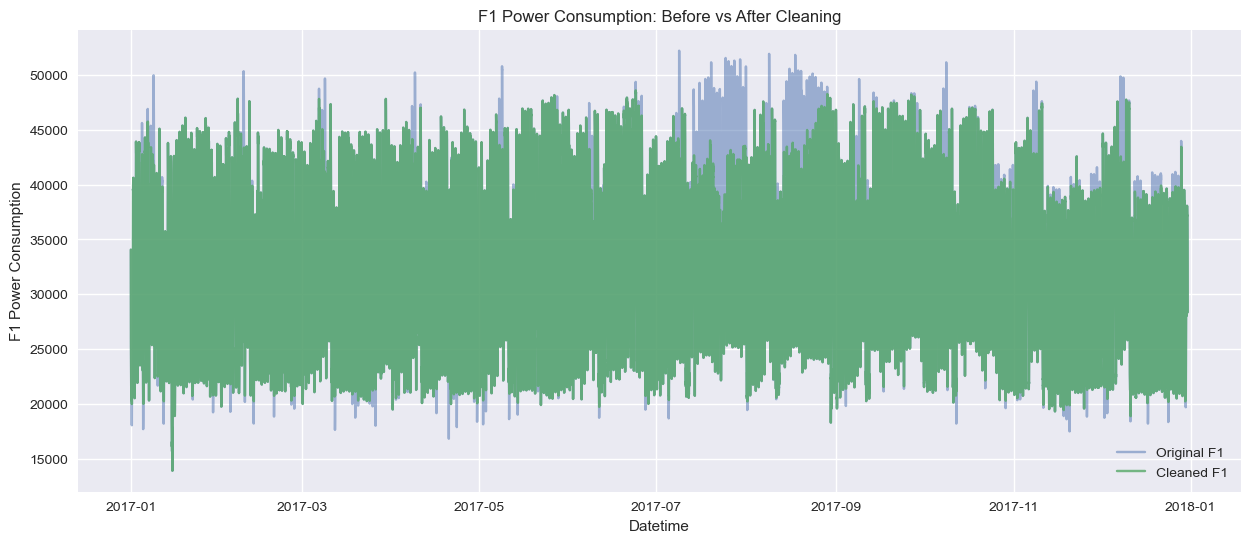

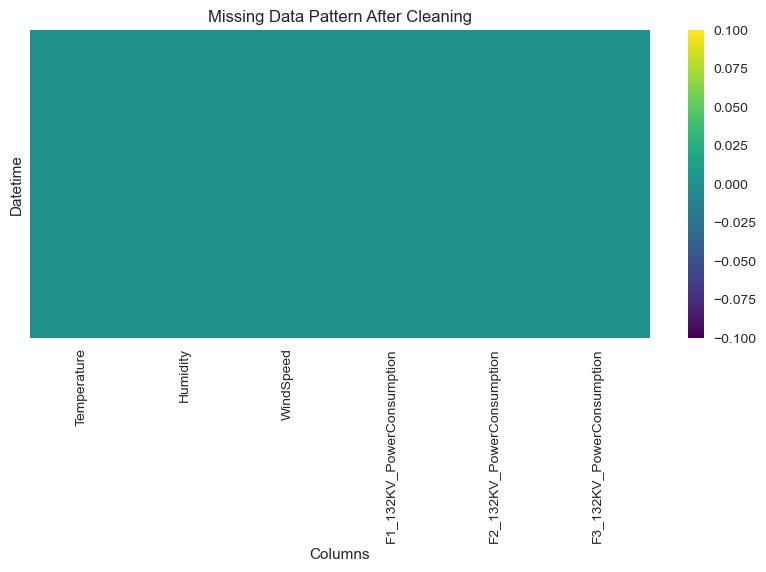

Validation Metrics:
Original shape: (52416, 8)
Cleaned shape: (52416, 6)
Missing values after cleaning: 0
Date range after cleaning: 2017-01-01 00:00:00 to 2017-12-30 23:50:00


In [10]:
# Visualize outlier removal effect
plt.figure(figsize=(15, 6))
plt.plot(df['Datetime'], df['F1_132KV_PowerConsumption'], label='Original F1', alpha=0.5)
plt.plot(df_clean.index, df_clean['F1_132KV_PowerConsumption'], label='Cleaned F1', alpha=0.8)
plt.xlabel('Datetime')
plt.ylabel('F1 Power Consumption')
plt.title('F1 Power Consumption: Before vs After Cleaning')
plt.legend()
plt.show()

# Visualize missing data pattern after cleaning
plt.figure(figsize=(10, 4))
sns.heatmap(df_clean.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Data Pattern After Cleaning')
plt.xlabel('Columns')
plt.show()

# Validation metrics
print('Validation Metrics:')
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")
print(f"Date range after cleaning: {df_clean.index.min()} to {df_clean.index.max()}")


# Data Cleaning Summary & Justification

This notebook implements a systematic data cleaning pipeline for the utility consumption dataset:
- Parsed mixed datetime formats and sorted the data
- Detected and removed anomalies using Isolation Forest (5% contamination)
- Filled gaps to ensure regular 10-minute intervals
- Imputed missing values using forward and backward fill
- Dropped outlier indicator column
- Saved the cleaned dataset for modeling

**Justification:**
- Outlier removal ensures robust model training
- Gap filling and imputation maintain time series integrity
- All steps are based on EDA findings and best practices for time series forecasting
